<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import tensorflow.keras as kr

#from IPython.core.display import display, HTML

In [23]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos concéntricos de datos.
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=500, factor=0.1, noise=0.1)


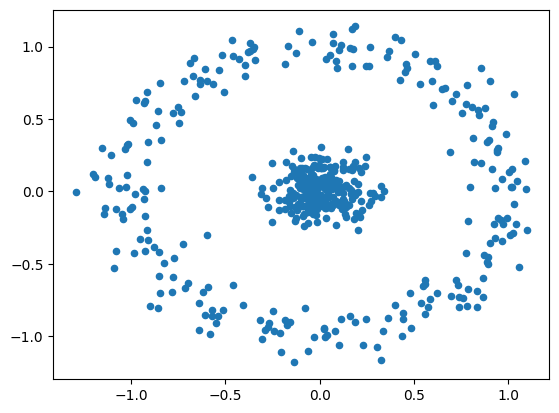

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s=20)

In [7]:
# learning rate
lr = 0.01
# número de neuronas por capa.
nn = [2, 16, 8, 1]

In [4]:
# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

In [9]:
# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

In [10]:
# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])

In [27]:
# Y entrenamos al modelo. Los callbacks
history = model.fit(X, Y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 45ms/step - loss: 0.1675 - acc: 1.0000 - val_loss: 0.1632 - val_acc: 0.9900
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1601 - acc: 1.0000 - val_loss: 0.1557 - val_acc: 1.0000
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1528 - acc: 1.0000 - val_loss: 0.1476 - val_acc: 1.0000
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1442 - acc: 1.0000 - val_loss: 0.1416 - val_acc: 0.9900
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1362 - acc: 1.0000 - val_loss: 0.1328 - val_acc: 0.9900
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1275 - acc: 1.0000 - val_loss: 0.1246 - val_acc: 1.0000
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1193 - acc: 1.0000 - val_loss: 0.1173 - val_acc: 1.0000
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1114 - 

In [28]:
# Obtener predicciones
predicciones = model.predict(X)

16/16 [==============================] - 0s 1ms/step


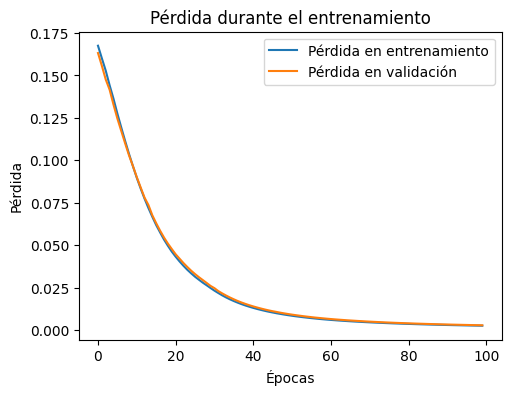

In [29]:
# Graficar la pérdida y la precisión a lo largo de las épocas
plt.figure(figsize=(12, 4))

# Graficar la pérdida (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

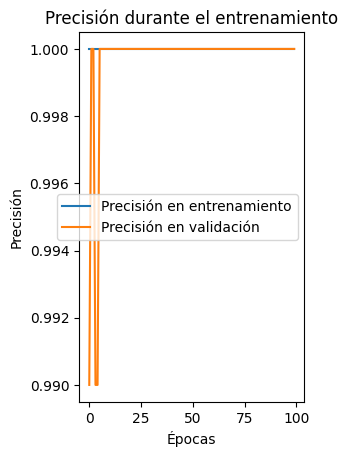

In [30]:
# Graficar la precisión (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Precisión en entrenamiento')
plt.plot(history.history['val_acc'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

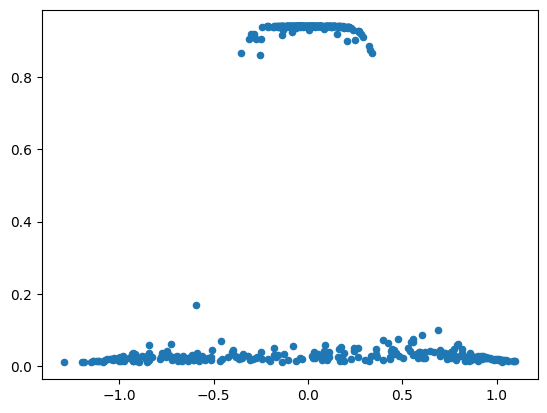

In [31]:
plt.scatter(X[:, 0], predicciones, s=20)